http://scikit-learn.org/stable/tutorial/basic/tutorial.html

http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

Salient points - all data presented to classified as 2d array of samples vs features. Flatten 2 image to 1d array and call them features. Split data into test and train.

In [1]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [3]:
image0 = digits.images[0]    # a single digit image
#images are ndarray
image0.shape

(8, 8)

In [4]:
images_and_labels = list(zip(digits.images, digits.target))  # target is the classification label
len(images_and_labels)  # how many images

1797

In [5]:
images_and_labels[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)

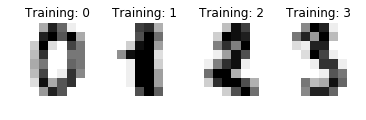

In [6]:
for index, (image, label) in enumerate(images_and_labels[:4]):    # plot first 4 images and their label
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [7]:
n_samples = len(digits.images)
n_samples

1797

In [8]:
data = digits.images.reshape((n_samples, -1))      # flatten the image using np.reshape
data.shape

(1797, 64)

In [9]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [10]:
test_data = data[:round(n_samples / 2)]
test_data_labels = digits.target[:round(n_samples / 2)]

In [11]:
# We learn the digits on the first half of the digits
classifier.fit(test_data, test_data_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# Now predict the value of the digit on the second half:
expected = digits.target[round(n_samples / 2):]                # labels of the second half of the data
predicted = classifier.predict(data[round(n_samples / 2):])    # run the classifier

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

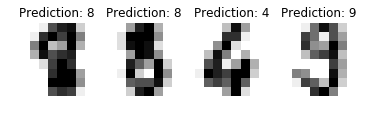

In [13]:
images_and_predictions = list(zip(digits.images[round(n_samples / 2):], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [14]:
from sklearn.externals import joblib
joblib.dump(classifier, 'classifier.pkl')     # save the classifier as a pickle object

['classifier.pkl']

In [15]:
ls

Introduction - character recognition 5-2-2017.ipynb
README.md
classifier.pkl
